In [1]:
import pandas as pd
import numpy as np

In [2]:
# df = pd.read_csv("emotions_cleaned smaller.csv")
df = pd.read_csv("Dry_Bean_Dataset.csv")
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [4]:
X = df.drop(['Class'], axis=1)
y = df['Class']
print(X.head())
print(y.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     0.913358      0.007332      0.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10,
                                                    random_state =0)
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(13611, 16)
(12249, 16)
(1362, 16)


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2))
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  16


In [8]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)
print(X_train.shape)
print(X_test.shape)

(16, 16)
(16, 16)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:")
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 55   0  46   0  19   0   5]
 [  0  49   0   0   0   0   0]
 [ 57   0 110   0  13   1   1]
 [  0   0   0 325   2  27  11]
 [ 17   0  10   3 126   0  33]
 [  0   0   0  38   3 121  36]
 [  1   0   0  36  14  10 193]]
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.42      0.44      0.43       125
      BOMBAY       1.00      1.00      1.00        49
        CALI       0.66      0.60      0.63       182
    DERMASON       0.81      0.89      0.85       365
       HOROZ       0.71      0.67      0.69       189
       SEKER       0.76      0.61      0.68       198
        SIRA       0.69      0.76      0.72       254

    accuracy                           0.72      1362
   macro avg       0.72      0.71      0.71      1362
weighted avg       0.72      0.72      0.72      1362

Accuracy: 0.7187958883994127


Accuracy Score        :  0.7187958883994127
Classification Report : 
               precision    recall  f1-score   support

    BARBUNYA       0.42      0.44      0.43       125
      BOMBAY       1.00      1.00      1.00        49
        CALI       0.66      0.60      0.63       182
    DERMASON       0.81      0.89      0.85       365
       HOROZ       0.71      0.67      0.69       189
       SEKER       0.76      0.61      0.68       198
        SIRA       0.69      0.76      0.72       254

    accuracy                           0.72      1362
   macro avg       0.72      0.71      0.71      1362
weighted avg       0.72      0.72      0.72      1362



<Axes: >

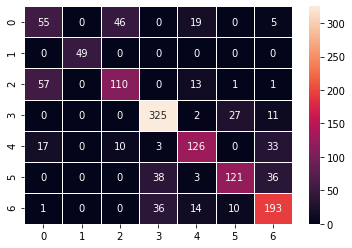

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
print("Accuracy Score        : ",accuracy_score(y_test, ypred))
print("Classification Report : \n", classification_report(y_test, ypred))
cfm=confusion_matrix(y_test,ypred)
import seaborn as sns
sns.heatmap(cfm,annot=True,fmt='',linewidths=0.5)

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV

# hyperparameter tunning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],  # weighting schemes
    'metric': ['euclidean', 'manhattan']  # distance metrics
}

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}


In [16]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7922173274596183
